# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [81]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [82]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 579


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [83]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city.replace(' ', '+')}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | codrington
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | olonkinbyen
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | avarua
Processing Record 8 of Set 1 | carnarvon
Processing Record 9 of Set 1 | puerto natales
Processing Record 10 of Set 1 | vilyuysk
Processing Record 11 of Set 1 | mount pearl
Processing Record 12 of Set 1 | tolanaro
Processing Record 13 of Set 1 | tahla
Processing Record 14 of Set 1 | vilyuchinsk
Processing Record 15 of Set 1 | mallow
Processing Record 16 of Set 1 | tura
Processing Record 17 of Set 1 | taiohae
City not found. Skipping...
Processing Record 18 of Set 1 | bilibino
Processing Record 19 of Set 1 | port mathurin
Processing Record 20 of Set 1 | christchurch
Processing Record 21 of Set 1 | kholmsk
Processing Record 22 of Set 1 | katarag

In [84]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [85]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bredasdorp,-34.5322,20.0403,65.19,91,2,4.61,ZA,1707714216
1,codrington,-38.2667,141.9667,72.66,58,0,11.48,AU,1707714216
2,jamestown,42.0970,-79.2353,32.02,90,100,5.01,US,1707714053
3,yellowknife,62.4560,-114.3525,5.56,96,20,5.75,CA,1707714073
4,olonkinbyen,70.9221,-8.7187,28.00,64,100,10.07,SJ,1707714216


In [86]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data\cities.csv", index_label="City_ID")

In [87]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bredasdorp,-34.5322,20.0403,65.19,91,2,4.61,ZA,1707714216
1,codrington,-38.2667,141.9667,72.66,58,0,11.48,AU,1707714216
2,jamestown,42.0970,-79.2353,32.02,90,100,5.01,US,1707714053
3,yellowknife,62.4560,-114.3525,5.56,96,20,5.75,CA,1707714073
4,olonkinbyen,70.9221,-8.7187,28.00,64,100,10.07,SJ,1707714216


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

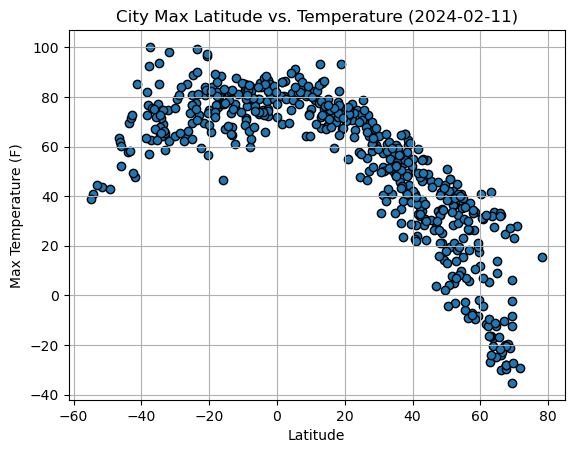

In [104]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors='black')

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2024-02-11)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

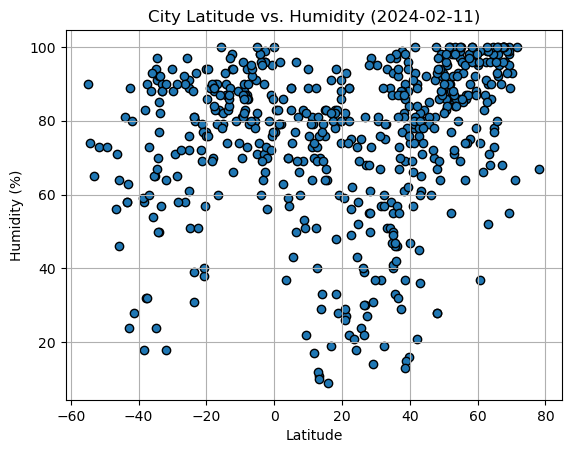

In [107]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-02-11)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

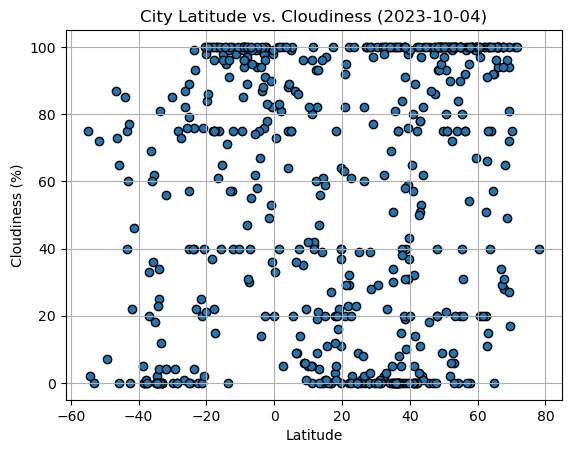

In [90]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-02-11)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

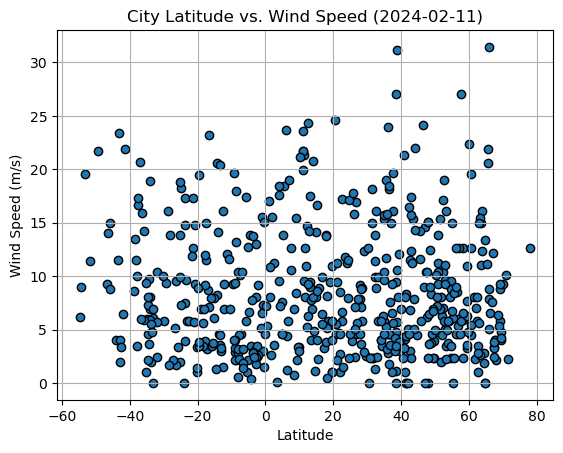

In [106]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-02-11)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [144]:
# Define a function to create Linear Regression plots
def plot_linregress(x_values, y_values, x_label, y_label):
    # Run linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot
    plt.scatter(x_values, y_values)

    # Plot regression line
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize = 15, color="red")

    # Label plot
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    # Show plot
    print(f"The r-value is: {rvalue}")
    plt.show()

In [145]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,jamestown,42.0970,-79.2353,32.02,90,100,5.01,US,1707714053
3,yellowknife,62.4560,-114.3525,5.56,96,20,5.75,CA,1707714073
4,olonkinbyen,70.9221,-8.7187,28.00,64,100,10.07,SJ,1707714216
9,vilyuysk,63.7553,121.6247,-17.00,96,100,11.01,RU,1707714217
10,mount pearl,47.5166,-52.7813,34.14,91,100,10.36,CA,1707714217


In [146]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']< 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bredasdorp,-34.5322,20.0403,65.19,91,2,4.61,ZA,1707714216
1,codrington,-38.2667,141.9667,72.66,58,0,11.48,AU,1707714216
5,grytviken,-54.2811,-36.5092,40.89,74,2,8.97,GS,1707714217
6,avarua,-21.2078,-159.7750,80.65,69,20,12.66,CK,1707714076
7,carnarvon,-24.8667,113.6333,88.81,51,0,18.23,AU,1707714019


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.886898573749821


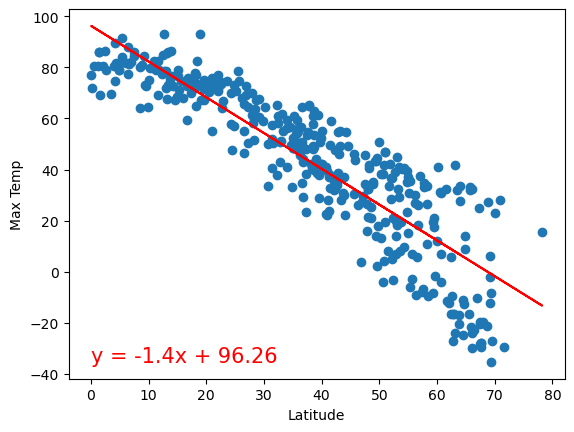

In [147]:
# Linear regression on Northern Hemisphere
plot_linregress(northern_hemi_df['Lat'], 
                       northern_hemi_df['Max Temp'], 'Latitude', 'Max Temp')

The r-value is: 0.4791690565854256


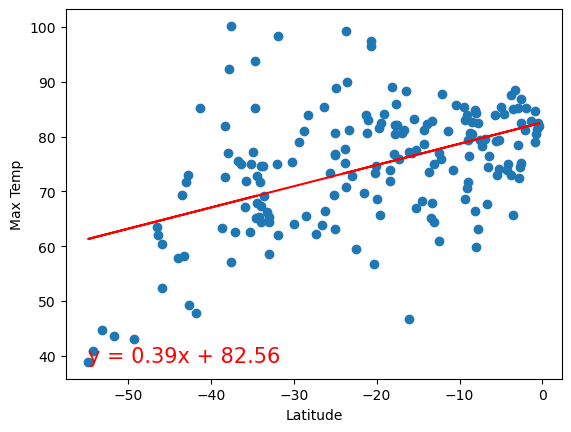

In [143]:
# Linear regression on Southern Hemisphere
plot_linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'],
                       'Latitude', 'Max Temp')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.39


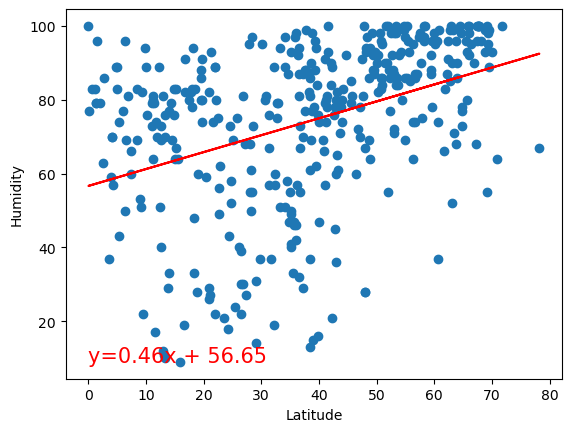

In [133]:
# Northern Hemisphere
plot_linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Latitude', 'Humidity')

The r-value is: 0.38


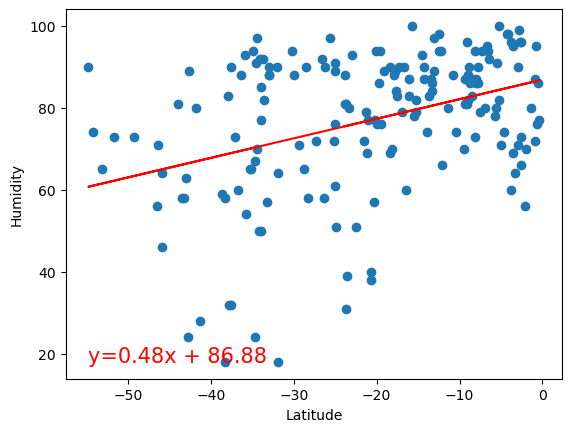

In [134]:
# Southern Hemisphere
plot_linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Latitude', 'Humidity')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.29


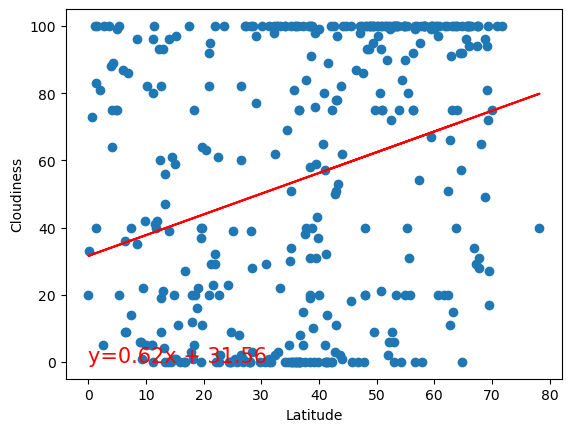

In [135]:
# Northern Hemisphere
plot_linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness')

The r-value is: 0.54


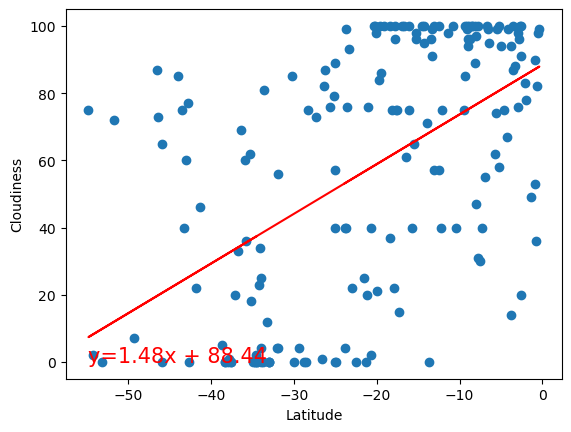

In [136]:
# Southern Hemisphere
plot_linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.09


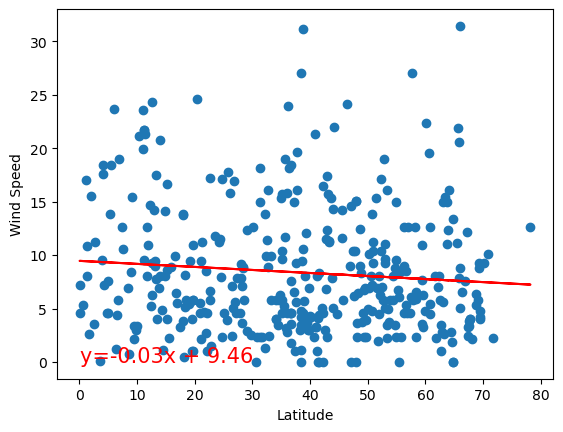

In [137]:
# Northern Hemisphere
plot_linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed')

The r-value is: -0.23


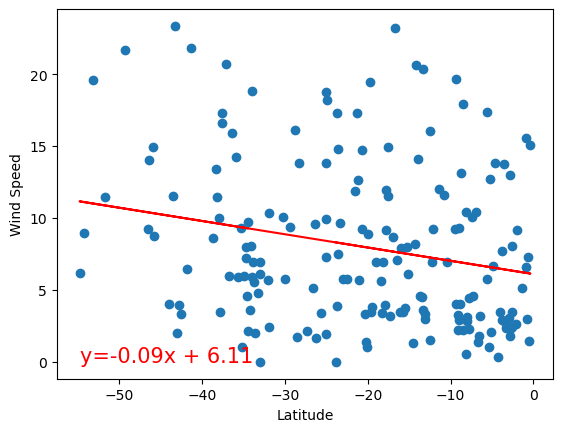

In [138]:
# Southern Hemisphere
plot_linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed')

**Discussion about the linear relationship:** YOUR RESPONSE HERE